In [1]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [8]:
# Import data
NBE_df = pd.read_excel('FL2019_Data_Base_NBI.xls', sheet_name='NBI and NBE')
NBE_df.head()
# print(" ***********************")
# print(NBE_df.head())

,STRUCNUM,%CS1,%CS2,%CS3,%CS4,MAINTENANCE_021,Bridge Age,ADT_029,DEGREES_SKEW_034,SERVICE_ON_042A,...,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,APPR_ROAD_EVAL_072,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION
0,10032,97.755570,0.835518,1.089450,0.319463,1,50,7500,19,1,...,50.1,29.9,7,8,1,6,8,8,7,G
1,10033,98.522337,0.154639,1.323024,0.000000,1,86,14750,23,1,...,54.6,32.7,7,8,1,6,0,0,6,G
2,10042,98.060676,0.048003,1.891321,0.000000,1,52,50000,0,1,...,62.1,37.2,7,8,1,0,0,0,4,G
3,10045,99.385217,0.565880,0.048903,0.000000,1,27,52000,0,1,...,71.7,42.9,7,8,1,0,0,0,4,G
4,10050,19.782926,80.064247,0.150678,0.002149,1,45,25500,0,5,...,62.5,37.2,7,8,1,0,0,0,4,G


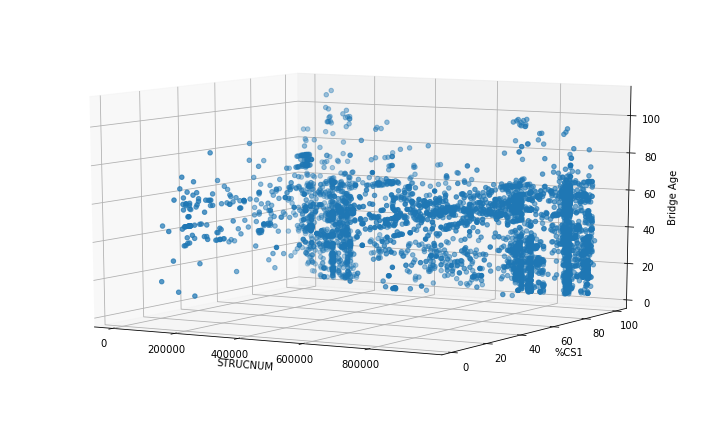

In [23]:
#3D Visualization
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

#nbe_df = NBE_df[nbe_df['STRUCNUM'] <=1000]
ax.scatter(xs=NBE_df['STRUCNUM'], ys=NBE_df['%CS1'], zs=NBE_df['Bridge Age'])

ax.set_ylabel('%CS1'); ax.set_xlabel('STRUCNUM'); ax.set_zlabel('Bridge Age')
ax.view_init(10, -60)

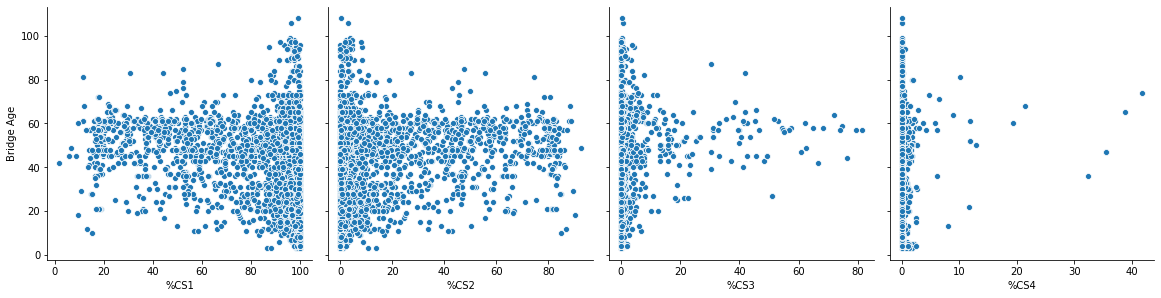

In [40]:
# 2D Visulization
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(NBE_df, x_vars=['%CS1', '%CS2','%CS3','%CS4'], 
             y_vars='Bridge Age', size=4, aspect=1, kind='scatter')
plt.show()

In [41]:
#Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = NBE_df[['Bridge Age', 'ADT_029']]
Y = NBE_df['%CS1'].astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [42]:
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [45]:
print(Model.coef_)

[-3.05586586e-01  2.13621491e-05]


In [46]:
print(Model.intercept_)

100.125182306842


In [50]:
pd.DataFrame(Model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Bridge Age,-0.305587
ADT_029,0.000021


In [51]:
predictions = Model.predict(X_test)

18.94392808501327

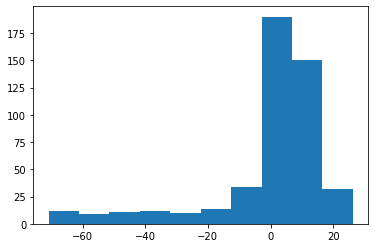

In [52]:
# plt.scatter(y_test, predictions)

plt.hist(y_test - predictions)

from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

metrics.mean_squared_error(y_test, predictions)

np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [55]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   %CS1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     189.2
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.98e-79
Time:                        02:02:40   Log-Likelihood:                -18717.
No. Observations:                4265   AIC:                         3.744e+04
Df Residuals:                    4262   BIC:                         3.746e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1252      0.697    143.557      0.000      98.758     101.493
Bridge Age    -0.3056      0.016    -19.428      0.000      -0.336      -0.275
ADT_029     2.136e-05   8.24e-06      2.593      0.010    5.21e-06    3.75e-05
==============================================================================
Omnibus:                     1811.194   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6753.236
Skew:                          -2.169   Prob(JB):                         0.00
Kurtosis:                       7.379   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""